In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.genfromtxt('datasets/data_1d.csv', delimiter=',')
# np.savetxt('datasets/data_1d.csv',data,delimiter=',')
data[:3]

array([[  98.72416241,  200.17963609],
       [  38.75761893,   70.59066954],
       [  31.81684742,   63.85413282]])

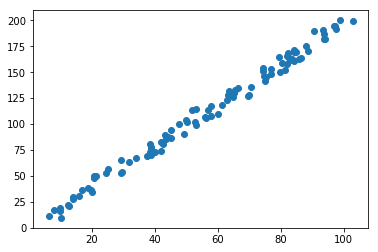

In [3]:
x = data[:,0].reshape(100,)#x_input
y = data[:,1].reshape(100,)#y_actual
plt.scatter(x,y)

In [4]:
#linear regression calculates an equation that minimizes the distance between the fitted line and all of the data points
#line of best fit
#Y_prediction = a*X + b
#sum of squared error
#Error =  Σ (y_actual - Y_prediction)^2
#Error =  Σ (y_actual - (a*X + b))^2
#minimize error by taking partial derivative w.r.t a and b,
#and equate them to zero to find value of a and b
denominator = (x*x).mean() - x.mean()*x.mean()
a = ((x*y).mean() - x.mean()*y.mean())/denominator
b = (y.mean()*(x*x).mean() - x.mean()*(x*y).mean())/denominator

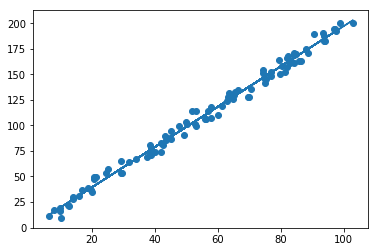

In [5]:
Y_prediction = a*x + b
plt.scatter(x,y)
plt.plot(x,Y_prediction)

In [6]:
#r-squared (R^2): coefficient of determination 
#tells about goodness of fit of a model
#a statistical measure of how well the regression line approximates the real data points.
#R^2 value close to 1 mean good fit
#R^2 value close to 0 mean bad fit
#R^2 <0 means our prediction is worst than mean.
#R^2 = 1 - SS_res/SS_tot
d1 = y - Y_prediction
d2 = y - y.mean()
SS_res = d1.dot(d1)
SS_tot = d2.dot(d2)
r2 = 1 - SS_res/SS_tot
r2

0.99118382029778052

# Multi-dimensional linear regression

In [7]:
#D: no of features
#N: no of samples/observations

#eqn: Y_prediction = Weight_matrix.Transpose * X + bias (bias can be moved to weight matrix)
#X: (N*D matrix)
#W: weight matrix (D*1 matrix), 

#Y1 = W.T * X1 (prediction for one sample) (X1: column vector, D*1 shape)
#Y_prediction = X*W (prediction for N samples) (Y_prediction: N*1 matrix)

#Error =  Σ (Y_actual - (W.T *X))^2
#take partial derivate of error function w.r.t all weights one by one to form D equations having D unknowns.

#x = A^-1 * b 
#x = np.linalg.solve(A,b)
#W = (X.T * X)^-1 * (X.T * Y_actual) (simultaneously finding all weigths)

X=[]
Y=[]
for line in open('datasets/data_2d.csv'):# 2 features
    x1,x2,y = line.split(',')
    X.append([float(x1),float(x2),1])# 1 is coeficient(x0) of bias w0 
    Y.append(float(y))

In [8]:
X=np.array(X)
Y=np.array(Y)
print(X[:2])
print(Y[:2])

[[ 17.93020121  94.52059195   1.        ]
 [ 97.14469719  69.59328198   1.        ]]
[ 320.2595296   404.63447153]


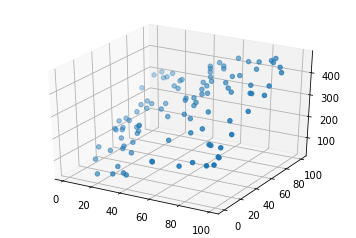

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
pl = fig.add_subplot(111,projection='3d')
pl.scatter(X[:,0],X[:,1],Y)

In [10]:
#calculating weight matrix
w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,Y))
w
#[w0, w1, w2]

array([ 2.01666793,  2.96985048,  1.46191241])

In [11]:
y_prediction = np.dot(X,w)
y_prediction

array([ 318.33319994,  404.05215029,  183.41670624,  322.95898681,
        324.09531924,   94.78736642,  356.51965828,  184.7045282 ,
        421.36398156,  372.89003776,  420.82132299,  287.00310339,
        393.30167652,  318.52865492,  281.37741721,  300.6282601 ,
        158.96651471,  445.43185204,  257.33599551,  231.80365075,
        168.58895059,   81.20417699,  461.85259581,  105.07526001,
        360.80736319,  429.8853733 ,  232.13208452,  284.79001674,
        298.13156645,  309.48629992,  123.46344238,  221.75658332,
        238.44429142,  142.26360319,  390.40465353,  334.24931407,
        456.16846134,  378.35816861,  235.89502471,  184.96238198,
        123.66690112,  191.38916206,  231.03388931,  379.98661023,
        294.56444183,  306.79852917,  204.77159138,  180.59515878,
        237.27565987,  350.23799634,  350.0323209 ,  373.37619418,
        243.50109295,  299.81730508,  148.33618997,  138.62127559,
        312.35210278,  257.32788644,  336.35485783,   69.97000

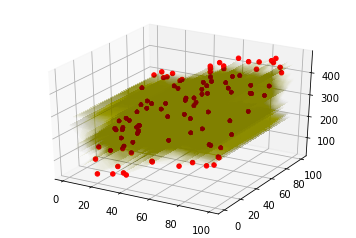

In [12]:
fig = plt.figure()
pl = fig.add_subplot(111,projection='3d')
xx, yy = np.meshgrid(X[:,0], X[:,1])
pl.plot_surface(xx, yy, y_prediction.reshape(X[:,0].shape),rstride=1,cstride=1,color='yellow',alpha = 0.005)
pl.scatter(X[:,0],X[:,1],Y, c='r', marker='o',alpha=1)
#???

In [13]:
#r-squared
d1 = Y - y_prediction
d2 = Y - Y.mean()
SS_res = d1.dot(d1)
SS_tot = d2.dot(d2)
r2 = 1 - SS_res/SS_tot
r2

0.99800406124757779

# Polynomial regression

In [14]:
#Y = w0*x0 + w1*x1 + w2*x2 .....wd*xd, w0=bias,x0=1
#y = w1*x^2 +w2*x +w0
#Y = W0*1 + W1*x1^2 + W2*x1
#same as multi-regression
X=[]
Y=[]
for line in open('datasets/poly.csv'):# 2 features
    x,y = line.split(',')
    X.append([float(x),float(x)*float(x),1])# 1 is coeficient(x0) of bias w0 
    Y.append(float(y))
X = np.array(X)+2
Y = np.array(Y)+2
print(X[:3])
print(Y[:3])

[[  8.17007086e+01   6.35420295e+03   3.00000000e+00]
 [  1.00273544e+02   9.65968948e+03   3.00000000e+00]
 [  7.80957232e+01   5.79255910e+03   3.00000000e+00]]
[  668.79727557  1019.3622816    623.93882692]


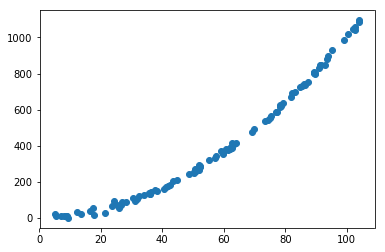

In [15]:
plt.scatter(X[:,0],Y)

In [16]:
#calculating weight matrix
w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,Y))
w

array([ 0.40772538,  0.09961723,  2.04777833])

In [17]:
y_prediction = np.dot(X,w)
y_prediction

array([  672.44287454,  1009.2988976 ,   615.02362631,   276.08607979,
         153.32813003,   412.81918605,   841.19976157,   103.65186489,
        1057.95989515,   243.89332491,   111.58966099,  1059.83612234,
           9.78083065,   264.52138605,   363.59958906,   909.55885525,
          21.80459775,   259.50399972,   694.26769588,   390.23485654,
         984.12092513,   108.42803189,    85.39495317,   600.57463206,
        1085.9631641 ,    14.63715862,   123.14489636,   835.06709788,
         133.77455611,   263.31393487,    73.4773103 ,   392.55898857,
         171.69335745,    66.21148077,    79.43388136,   542.29308657,
           9.32820293,   869.48868046,   334.37430615,   134.80561412,
         180.72532997,   147.15749008,   557.34160195,    25.04218959,
         572.88382575,   397.44771006,   878.12454918,    61.78726476,
         375.6037575 ,    52.7290708 ,    34.31222865,   275.24628004,
         802.58605861,   277.4997833 ,    98.83928591,   396.79823046,
      

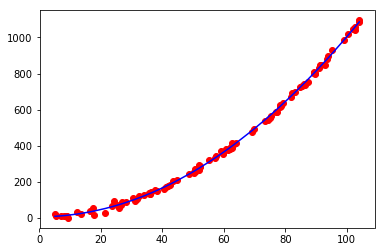

In [18]:
plt.scatter(X[:,0],Y,c='r')
plt.plot(sorted(X[:,0]),sorted(y_prediction),c='b')

Ref:

https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/v/r-squared-or-coefficient-of-determination

http://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf